# Data Processing

In this notebook, we will convert the responses gotten from our survey in the mongodp database to a csv file and load it. We would also visualize the csv file and reveal some insights.

In [1]:
#import necessary modules

import pandas as pd
import pymongo
import csv

#### Class Creation

In [2]:
#creating the class User which contain the survey attributes and converts them to a dictionary

class User:
    def __init__(self,age,gender,total_income,expenses):
        self.age= age
        self.gender = gender
        self.total_income = total_income
        self.expenses = expenses
        
    def convert_to_dict(self):
        return {
            
            'Age': self.age,
            'Gender': self.gender,
            'Total Income': self.total_income,
            'Utilities': self.expenses.get('utilities', 0),
            'Entertainment': self.expenses.get('entertainment', 0),
            'School Fees': self.expenses.get('school_fees', 0),
            'Shopping': self.expenses.get('shopping', 0),
            'Healthcare': self.expenses.get('healthcare', 0)
        }
        
#we use the get() method to retrieve details from the expense and there is a '0' at the end, which indicates the get() method
#will return zero, where the user did not input value in the expense categories

#### MongoDP Retrieval

In [3]:
# Retrieve data from the mongodb

mongo_client=pymongo.MongoClient("mongodb://localhost:27017/")
database = mongo_client["Survey"]
collection = database["Userinput"]
    
user_details = collection.find()
    
users=[]
    
#looping through the mongodb documents
for details in user_details:
    age = details.get('age')
    gender = details.get('gender')
    total_income = details.get('total_income')
    expenses = details.get('expenses', {})
    
    user= User(age, gender, total_income, expenses)
    
    users.append(user)
    

#### Creating CSV file

In [4]:
#Creating the csv file

#file path
csv_file = 'survey.csv'

#write the user data into the csv

with open(csv_file, mode='w', newline='')as file:
    columnnames = ['Age', 'Gender', 'Total Income', 'Utilities', 'Entertainment', 'School Fees', 'Shopping', 'Healthcare']
    writer = csv.DictWriter(file, fieldnames=columnnames)
    
    # Write the header
    writer.writeheader()

    # Loop through each User object and write their data to the CSV file
    for user in users:
        writer.writerow(user.convert_to_dict())

print(f"Data successfully written to {csv_file}")

Data successfully written to survey.csv


#### Loading/Reading the CSV file

In [5]:
#loading the csv file into a dataframe

df=pd.read_csv('Survey.csv')

df.head(3)

,Age,Gender,Total Income,Utilities,Entertainment,School Fees,Shopping,Healthcare
0,28,Male,500000,100000.0,50000.0,50000.0,50000.0,50000.0
1,54,Female,639876,23456.0,23652.0,34567.0,21567.0,12345.0
2,23,Male,550000,50000.0,50000.0,100000.0,20000.0,20000.0


'

# DATA VISUALIZATION

In [6]:
#import necessary modules

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

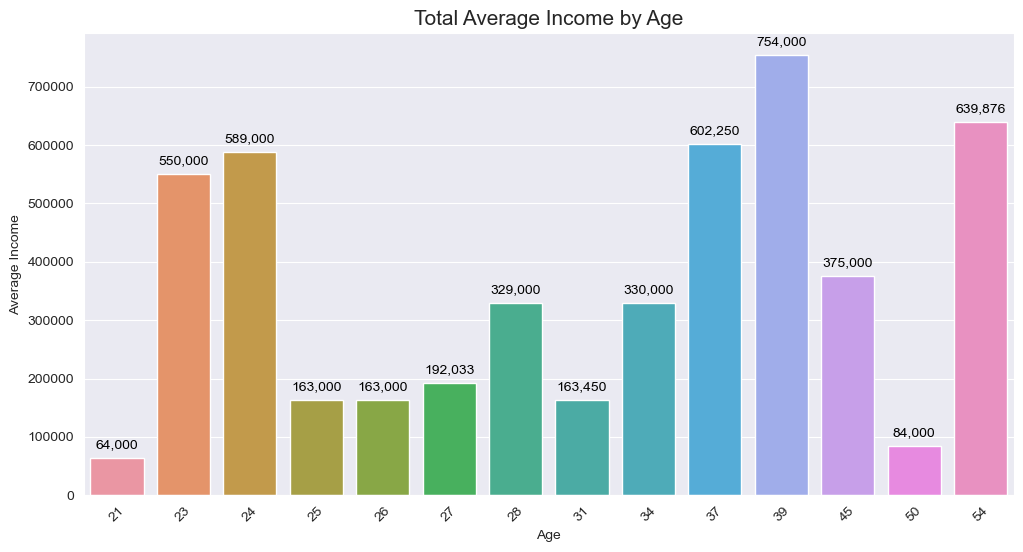

In [7]:
#Ages with higest income

#we find the highest income by getting the mean of all the ages.
df_mean = df.groupby('Age')['Total Income'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.set_style('darkgrid')
barplot=sns.barplot(x='Age', y='Total Income',data=df_mean,ci=None)
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():,.0f}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='bottom', fontsize=10, color='black', 
                      xytext=(0, 5),  # Offset the label slightly above the bar
                      textcoords='offset points')

plt.title('Total Average Income by Age', fontsize=15)
plt.xlabel('Age')
plt.ylabel('Average Income')
plt.xticks(rotation=45)

#export chart
plt.savefig('Income by Age.png', dpi=300)  # Save as PNG with high resolution

plt.show()

The chart above shows the highest average income by age. Age 39 have the highest income with 754k. Followed by ages 54, 37, 24 and 23. From the chart we can not make meaningful and detailed inference due to limited data. We recommend collect more responses and revisualizing.

#### Gender Distribution across Expenses

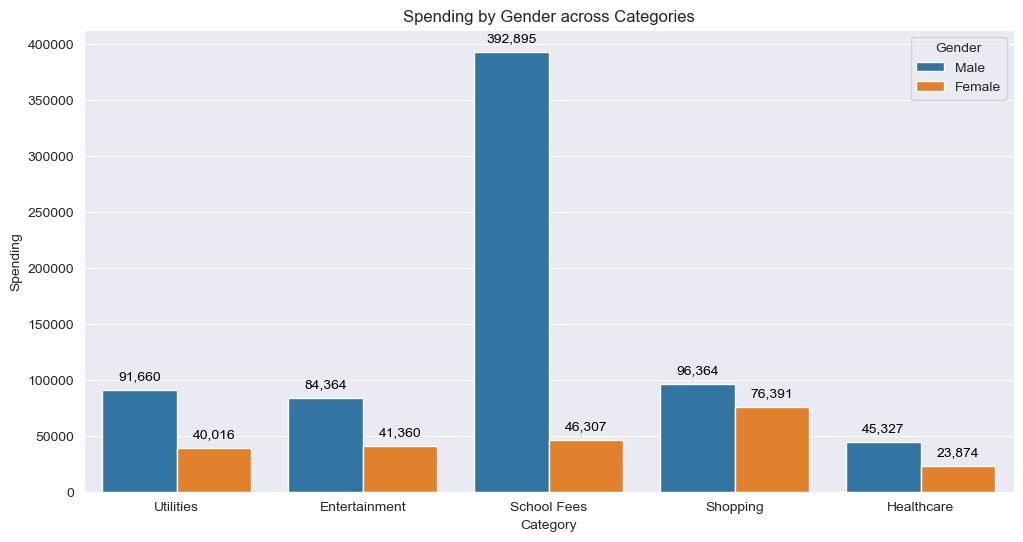

In [8]:
#To effectively visualize this chart, we have to melt the original expense categories columns into a sigle column
#Then check the gender distribution against the column


df_melted = df.melt(id_vars=['Gender'], value_vars=['Utilities', 'Entertainment', 'School Fees', 'Shopping', 'Healthcare'],
                    var_name='Category', value_name='Spending')

plt.figure(figsize=(12,6))
sns.set_style('darkgrid')
barplot=sns.barplot(x='Category', y='Spending', hue='Gender', data=df_melted, ci=None)
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():,.0f}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='bottom', fontsize=10, color='black', 
                      xytext=(0, 5),  # Offset the label slightly above the bar
                      textcoords='offset points')
    
plt.title('Spending by Gender across Categories')

#export chart
plt.savefig('Spending Distribution via Gender.png', dpi=300)  # Save as PNG with high resolution

plt.show()

from the chart above, we can deduce that across all expense categories, males spent more than the females. The highest spending for the male was school fee, followed by shopping and utilities. The highest spending categories for females was shopping. In the healthcare category, males outspend the female, however, there is low spending appetite in this category. Our recommendation is a new survey should be carried out to decipher the inherent cause of the low spending in the healthcare region. This is make  the anticipated roll out of the new product to be a succesful one. 